<br><br>
<font size='6'><b>Classification </b></font><br><br>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Support Vector Machine</a></span><ul class="toc-item"><li><span><a href="#The-First-Attempt-(CVXPY-1)" data-toc-modified-id="The-First-Attempt-(CVXPY-1)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The First Attempt (CVXPY 1)</a></span></li><li><span><a href="#Outlier" data-toc-modified-id="Outlier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Outlier</a></span></li><li><span><a href="#The-Second-Attempt-(CVXPY-2)" data-toc-modified-id="The-Second-Attempt-(CVXPY-2)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>The Second Attempt (CVXPY 2)</a></span></li><li><span><a href="#Maximize-Margin-(Finally,-it-is-Support-Vector-Machine)" data-toc-modified-id="Maximize-Margin-(Finally,-it-is-Support-Vector-Machine)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Maximize Margin (Finally, it is Support Vector Machine)</a></span></li><li><span><a href="#Support-Vector-Machine(Compact-form)" data-toc-modified-id="Support-Vector-Machine(Compact-form)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Support Vector Machine(Compact form)</a></span></li><li><span><a href="#Nonlinear-Support-Vector-Machine" data-toc-modified-id="Nonlinear-Support-Vector-Machine-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Nonlinear Support Vector Machine</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-using-Scikit-Learn" data-toc-modified-id="Logistic-Regression-using-Scikit-Learn-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression using Scikit-Learn</a></span></li><li><span><a href="#Non-linear-Classification" data-toc-modified-id="Non-linear-Classification-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Non-linear Classification</a></span></li></ul></li></ul></div>

# Classification

- We will learn
    - perceptron
    - support vector machine
    - logistic regression

# Support Vector Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#training data gerneration
x1 = 8*np.random.rand(100, 1)
x2 = 7*np.random.rand(100, 1) - 4

g = 0.8*x1 + x2 - 3
g1 = g - 1
g0 = g + 1

C1 = np.where(g1 >= 0)[0]
C0 = np.where(g0 < 0)[0]

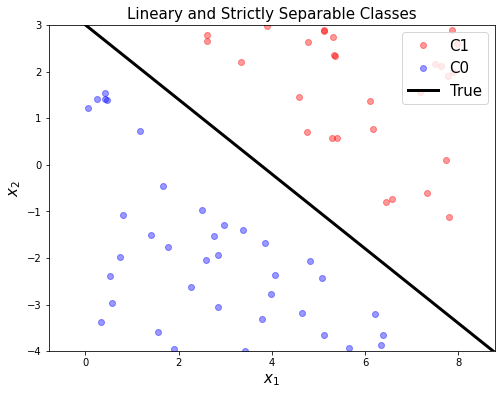

In [2]:
xp = np.linspace(-1,9,100).reshape(-1,1)
ypt = -0.8*xp + 3


'''
plot

'''
plt.figure(figsize=(8,6))
plt.plot(x1[C1], x2[C1], 'ro', alpha=0.4, label='C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha=0.4, label='C0')
plt.plot(xp, ypt, 'k', linewidth=3, label = 'True')
#plt.plot(xp, ypt-1, '--k')
#plt.plot(xp, ypt+1, '--k')
plt.title('Lineary and Strictly Separable Classes', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

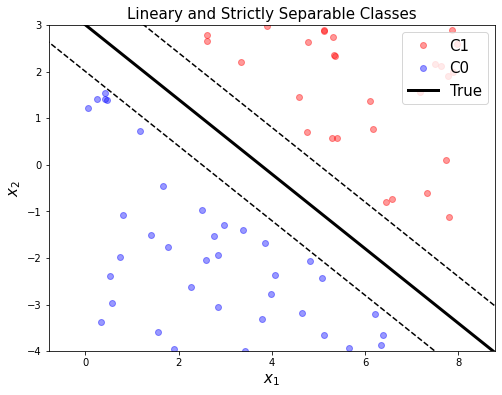

In [3]:
'''
xp, ypt

'''
xp = np.linspace(-1,9,100).reshape(-1,1)
ypt = -0.8*xp + 3

'''
plot
점선_1 : plt.plot( ,  , '--k')
점선_2 : plt.plot( ,  , '--k')

'''
plt.figure(figsize=(8,6))
plt.plot(x1[C1], x2[C1], 'ro', alpha=0.4, label='C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha=0.4, label='C0')
plt.plot(xp, ypt, 'k', linewidth=3, label = 'True')
plt.plot(xp, ypt-1, '--k')
plt.plot(xp, ypt+1, '--k')
plt.title('Lineary and Strictly Separable Classes', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

## The First Attempt (CVXPY 1)


- $n \;(=2)$ features

- $m = N + M$ data points in training set

<br>
$$ x^{(i)} = \begin{bmatrix} x^{(i)}_1 \\ x^{(i)}_2 \end{bmatrix} \;\text{with}\; \omega = \begin{bmatrix} \omega_1 \\ \omega_2 \end{bmatrix}\qquad \text{or} \qquad x^{(i)} = \begin{bmatrix} 1 \\ x^{(i)}_1 \\ x^{(i)}_2 \end{bmatrix}  \;\; \text{with}\; \omega = \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2 \end{bmatrix}$$

- $N$ belongs to $C_1$ in training set

- $M$ belongs to $C_0$ in training set
<br>
- $\omega$ and $\omega_0$ are the unknown variables

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 40% style="border-style: hidden; border-collapse: collapse;">
$$\begin{align*} \text{minimize} \quad
& \text{something} \\ \\
\text{subject to} \quad
& \begin{cases}
\omega_0 + \omega^Tx^{(1)} \geq1\\
\omega_0 + \omega^Tx^{(2)} \geq1\\
 \quad  \quad \vdots \\
\omega_0 + \omega^Tx^{(N)}\geq1\\
\end{cases} \\
& \begin{cases}
\omega_0 + \omega^Tx^{(N+1)} \leq{-1}\\
\omega_0 + \omega^Tx^{(N+2)} \leq{-1}\\
 \quad  \quad \vdots \\
\omega_0 + \omega^Tx^{(N+M)} \leq{-1}\\
\end{cases} \end{align*}$$
        </td>
        <td width = 40%>
$$\begin{align*} \text{minimize} \quad
& \text{something} \\ \\
\text{subject to} \quad
& \begin{cases}
\omega^Tx^{(1)} \geq1\\
\omega^Tx^{(2)} \geq1\\
 \quad  \quad \vdots \\
\omega^Tx^{(N)} \geq1\\
\end{cases} \\
& \begin{cases}
\omega^Tx^{(N+1)} \leq{-1}\\
\omega^Tx^{(N+2)} \leq{-1}\\
 \quad  \quad \vdots \\
\omega^Tx^{(N+M)} \leq{-1}\\
\end{cases} \end{align*}$$
        </td>
    </tr>
</table>

<font size='4'><b>Code</b></font>


<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 40% style="border-style: hidden; border-collapse: collapse;">
$$
\begin{align*} X_1 &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \vdots \\ \left(x^{(N)}\right)^T\end{bmatrix} =
\begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ 
\vdots & \vdots \\ x_1^{(N)} & x_2^{(N)} \\ 
\end{bmatrix}\\
X_0 &= \begin{bmatrix} \left(x^{(N+1)}\right)^T \\ \left(x^{(N+2)}\right)^T \\ \vdots \\ \left(x^{(N+M)}\right)^T\end{bmatrix} =
\begin{bmatrix} x_1^{(N+1)} & x_2^{(N+1)} \\ x_1^{(N+2)} & x_2^{(N+2)} \\ 
\vdots & \vdots \\ x_1^{(N+M)} & x_2^{(N+M)} \\ 
\end{bmatrix}\end{align*}$$
        </td>
        <td width = 40%>
$$
\begin{align*} X_1 &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \vdots \\ \left(x^{(N)}\right)^T\end{bmatrix} =
\begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 
\vdots & \vdots & \vdots \\ 1 & x_1^{(N)} & x_2^{(N)} \\ 
\end{bmatrix}\\
X_0 &= \begin{bmatrix} \left(x^{(N+1)}\right)^T \\ \left(x^{(N+2)}\right)^T \\ \vdots \\ \left(x^{(N+M)}\right)^T\end{bmatrix} =
\begin{bmatrix} 1 & x_1^{(N+1)} & x_2^{(N+1)} \\ 1 & x_1^{(N+2)} & x_2^{(N+2)} \\ 
\vdots & \vdots & \vdots \\ 1 & x_1^{(N+M)} & x_2^{(N+M)} \\ 
\end{bmatrix}\end{align*}$$
        </td>
    </tr>
</table>

<br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 40% style="border-style: hidden; border-collapse: collapse;">
$$\begin{align*} \text{minimize} \quad
& \text{something} \\
\text{subject to} \quad 
& \omega_0 + X_1\omega \geq 1 \\
& \omega_0 + X_0\omega \leq -1
\end{align*}$$
        </td>
        <td width = 40%>
$$\begin{align*} \text{minimize} \quad
& \text{something} \\
\text{subject to} \quad 
& X_1\omega \geq 1 \\
& X_0\omega \leq -1
\end{align*}$$
        </td>
    </tr>
</table>



<font size='4'><b>Form</b></font>

$$\begin{align*} \text{minimize} \quad
& \text{something} \\
\text{subject to} \quad 
& X_1\omega \geq 1 \\
& X_0\omega \leq -1
\end{align*}$$

In [4]:
import cvxpy as cvx

N = C1.shape[0]
M = C0.shape[0]

'''
X1, X0
Hint : (1, x1, x2) -> 학습에 사용할 데이터 형태
Hint2 : np.ones, hstack 사용
Hint3 : C1 label -> X1,
        C0 label -> X0
'''
X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([M,1]), x1[C0], x2[C0]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

In [7]:
'''
CVXPY 1
cvxpy 로 w 구하기
'''
w = cvx.Variable([3,1])

obj = cvx.Minimize(1)
const = [X1@w >= 1, X0@w <= -1]
prob = cvx.Problem(obj, const)
prob.solve()

w = w.value
print(w)

[[-269.84263684]
 [  83.19742972]
 [ 110.54267762]]


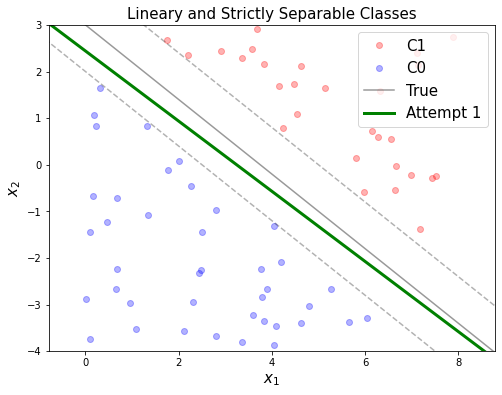

In [8]:
'''
xp, yp 구하기
Hint : linspace 이용
'''
xp = np.linspace(-1,9,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

'''
plot
'''
plt.figure(figsize=(8,6))
plt.plot(x1[C1], x2[C1], 'ro', alpha=0.3, label='C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha=0.3, label='C0')
plt.plot(xp, ypt, 'k', alpha=0.4, label = 'True')
plt.plot(xp, ypt-1, '--k', alpha=0.3)
plt.plot(xp, ypt+1, '--k', alpha=0.3)
plt.plot(xp, yp, 'g', linewidth=3, label = 'Attempt 1')
plt.title('Lineary and Strictly Separable Classes', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

## Outlier

- Note that in the real world, you may have noise, errors, or outliers that do not accurately represent the actual phenomena


- Non-separable case


- No solutions (hyperplane) exist
    - We will allow some training examples to be misclassified !
    - But we want their number to be minimized

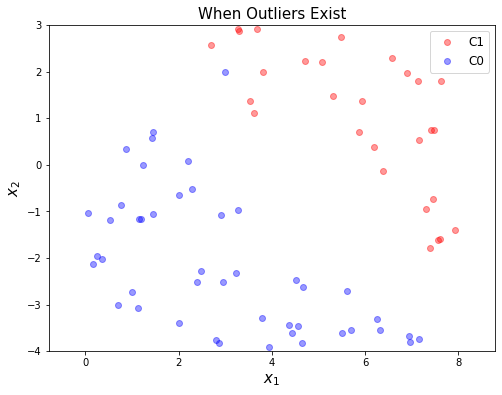

In [7]:
X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([M,1]), x1[C0], x2[C0]])

outlier = np.array([1, 3, 2]).reshape(1,-1)
X0 = np.vstack([X0, outlier])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

plt.figure(figsize=(8, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', alpha = 0.4, label = 'C1')
plt.plot(X0[:,1], X0[:,2], 'bo', alpha = 0.4, label = 'C0')
plt.title('When Outliers Exist', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

In [8]:
'''
CVXPY 1
cvxpy 로 w 구하기
(Hint : CVXPY 1에서 사용한 코드 이용)
'''
w = cvx.Variable([3, 1])

obj = cvx.Minimize(1)
const = [X1@w >= 1, X0@w <= -1]
prob = cvx.Problem(obj, const).solve()

w = w.value
print(w)

None


## The Second Attempt (CVXPY 2)


- $n \;(=2)$ features

- $m = N+M$ data points in a training set

$$x^i = \begin{bmatrix} x_1^{(i)} \\ x_2^{(i)} \end{bmatrix}$$

- $N$ belongs to $C_1$ in training set

- $M$ belongs to $C_0$ in training set
<br>
- $\omega$ and $\omega_0$ are the variables (unknown)


- For the non-separable case, we <font color='green'>relax</font> the above constraints

- <font color='red'>Need slack variables $u$ and $\upsilon$ where all are positive</font>


__The optimization problem for the non-separable case__


<br>
$$\begin{align*} \text{minimize} \quad & \sum\limits_{i=1}^{N}u_i + \sum\limits_{i=1}^{M}\upsilon_i \\ \\
\text{subject to} \quad
& \begin{cases}
\omega^Tx^{(1)} \geq 1-u_1\\
\omega^Tx^{(2)} \geq 1-u_2\\
 \quad  \quad \vdots \\
\omega^Tx^{(N)} \geq 1-u_N\\
\end{cases} \\\\
& \begin{cases}
\omega^Tx^{(N+1)} \leq {-(1-\upsilon_1)}\\
\omega^Tx^{(N+2)} \leq {-(1-\upsilon_2)}\\
 \quad  \quad \vdots \\
\omega^Tx^{(N+M)} \leq {-(1-\upsilon_M)}\\
\end{cases} \\\\
& \begin{cases}
u \geq 0\\
v \geq 0\\
\end{cases}
\end{align*}$$

<font size='4'><b>Code</b></font>
- Expressed in a matrix form


<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 40% style="border-style: hidden; border-collapse: collapse;">
$$
\begin{align*} X_1 &= \begin{bmatrix} x^{(1)^T} \\ x^{(2)^T} \\ \vdots \\ x^{(N)^T}\end{bmatrix} =
\begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ 
\vdots & \vdots \\ x_1^{(N)} & x_2^{(N)} \\ 
\end{bmatrix}\\\\
X_0 &= \begin{bmatrix} x^{(N+1)^T} \\ x^{(N+2)^T} \\ \vdots \\ x^{(N+M)^T}\end{bmatrix} =
\begin{bmatrix} x_1^{(N+1)} & x_2^{(N+1)} \\ x_1^{(N+2)} & x_2^{(N+2)} \\ 
\vdots & \vdots \\ x_1^{(N+M)} & x_2^{(N+M)} \\ 
\end{bmatrix} \\\\
u &= \begin{bmatrix} 
u_1\\
\vdots\\
u_N\\
\end{bmatrix}\\
\upsilon &= \begin{bmatrix} 
\upsilon_{1}\\
\vdots\\
\upsilon_{M}\\
\end{bmatrix}
\end{align*}$$
        </td>
        <td width = 40%>
$$
\begin{align*} X_1 &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \vdots \\ \left(x^{(N)}\right)^T\end{bmatrix} =
\begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 
\vdots & \vdots & \vdots \\ 1 & x_1^{(N)} & x_2^{(N)} \\ 
\end{bmatrix}\\\\
X_0 &= \begin{bmatrix} \left(x^{(N+1)}\right)^T \\ \left(x^{(N+2)}\right)^T \\ \vdots \\ \left(x^{(N+M)}\right)^T\end{bmatrix} =
\begin{bmatrix} 1 & x_1^{(N+1)} & x_2^{(N+1)} \\ 1 & x_1^{(N+2)} & x_2^{(N+2)} \\ 
\vdots & \vdots & \vdots \\ 1 & x_1^{(N+M)} & x_2^{(N+M)} \\ 
\end{bmatrix} \\\\
u &= \begin{bmatrix} 
u_1\\
\vdots\\
u_N\\
\end{bmatrix}\\
\upsilon &= \begin{bmatrix} 
\upsilon_{1}\\
\vdots\\
\upsilon_{M}\\
\end{bmatrix}
\end{align*}$$
        </td>
    </tr>
</table>

<br><br>
<font size='4'><b>Form</b></font>
<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 40% style="border-style: hidden; border-collapse: collapse;">
$$\begin{align*} \text{minimize} \quad  & 1^Tu + 1^T\upsilon \\
\text{subject to} \quad
& \omega_0 + X_1\omega \geq 1-u \\
& \omega_0 + X_0\omega \leq -(1-\upsilon) \\
& u \geq 0 \\
& \upsilon \geq 0
\end{align*}$$
        </td>
        <td width = 40%>
$$\begin{align*} \text{minimize} \quad  & 1^Tu + 1^T\upsilon \\
\text{subject to} \quad
& X_1\omega \geq 1-u \\
& X_0\omega \leq -(1-\upsilon) \\
& u \geq 0 \\
& \upsilon \geq 0
\end{align*}$$
        </td>
    </tr>
</table>

In [9]:
'''
X1, X0, outlier
X0 outlier vstack
'''
X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([M,1]), x1[C0], x2[C0]])

outlier = np.array([1, 4, 1]).reshape(1,-1)
outlier2 = np.array([1, 2.2, 2]).reshape(1,-1)
X0 = np.vstack([X0, outlier])
X0 = np.vstack([X0, outlier2])


X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

N = X1.shape[0]
M = X0.shape[0]

In [10]:
'''
CVXPY 2
cvxpy 로 w 구하기
(Hint : 3개의 변수 w, u, v 지정 필요)

w -> 3 x 1
u -> C1 label 데이터 개수 x 1
v -> C0 label 데이터 개수(outlier 포함) x 1
'''
w = cvx.Variable([3, 1])
u = cvx.Variable([N, 1])
v = cvx.Variable([M, 1])

#obj = cvx.Minimize(np.ones((N,1)).T@u + np.ones((M,1)).T@v)
obj = cvx.Minimize(np.ones((1,N))@u + np.ones((1,M))@v)
const = [X1@w >= 1-u, X0@w <= -(1-v), u >=0, v >= 0]
prob = cvx.Problem(obj, const).solve()

w = w.value
print(w)

[[-11.1169641 ]
 [  2.57598148]
 [  2.22490242]]


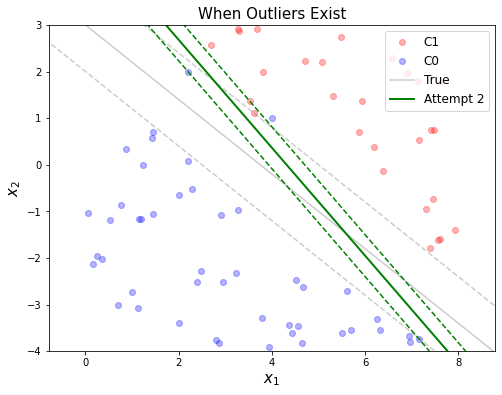

In [11]:
'''
xp, yp
(Hint : linspace 이용)
'''
xp = np.linspace(-1,9,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]


'''
plot

'''
plt.figure(figsize=(8, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X0[:,1], X0[:,2], 'bo', alpha = 0.3, label = 'C0')

plt.plot(xp, ypt-1, '--k', alpha=0.2)
plt.plot(xp, ypt+1, '--k', alpha=0.2)
plt.plot(xp, ypt, 'k', alpha=0.2, label = 'True')

plt.plot(xp, yp-1/w[2,0], '--g')
plt.plot(xp, yp+1/w[2,0], '--g')
plt.plot(xp, yp, 'g', linewidth=2, label = 'Attempt 2')

plt.title('When Outliers Exist', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

<font size='4'><b>Further improvement</b></font>

- Notice that hyperplane is not as accurately represent the division due to the outlier


- Can we do better when there are noise data or outliers?


- Yes, but we need to look beyond LP


- Idea: large margin leads to good generalization on the test data

## Maximize Margin (Finally, it is Support Vector Machine)


- Distance (= margin)

$$\text{margin} = \frac{2}{\lVert \omega \rVert _2}$$


- Minimize $\lVert \omega \rVert_2$ to maximize the margin
<br><br>
- Multiple objectives


- Use gamma ($\gamma$) as a weighting betwwen the followings:
    - Bigger margin given robustness to outliers
    - Hyperplane that has few (or no) errors


<br><br>
$$\begin{align*} \text{minimize} \quad 
& \lVert \omega \rVert_2 + \gamma(1^Tu + 1^T\upsilon) \\
\text{subject to} \quad
& X_1\omega \geq 1-u \\
& X_0\omega \leq -(1-\upsilon) \\
& u \geq 0 \\
& \upsilon \geq 0
\end{align*}$$



In [16]:
g = 2
'''
SVM
cvxpy 로 w 구하기

Hint : obj = cvx.Minimize(  + g*(  ))
'''
w = cvx.Variable([3, 1])
u = cvx.Variable([N, 1])
v = cvx.Variable([M, 1])

obj = cvx.Minimize(cvx.norm(w,2) + g*(np.ones([1,N])@u + np.ones([1,M])@v))
const = [X1@w >= 1-u, X0@w <= -(1-v), u >=0, v >= 0]
prob = cvx.Problem(obj, const).solve()

w = w.value

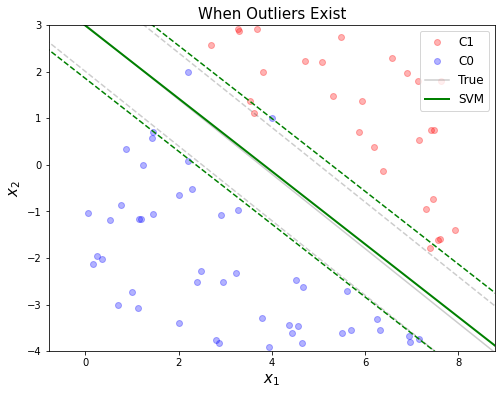

In [17]:
'''
xp, yp
'''
xp = np.linspace(-1,9,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]
'''
plot
'''
plt.figure(figsize=(8, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X0[:,1], X0[:,2], 'bo', alpha = 0.3, label = 'C0')

plt.plot(xp, ypt-1, '--k', alpha=0.2)
plt.plot(xp, ypt+1, '--k', alpha=0.2)
plt.plot(xp, ypt, 'k', alpha=0.2, label = 'True')

plt.plot(xp, yp-1/w[2,0], '--g')
plt.plot(xp, yp+1/w[2,0], '--g')
plt.plot(xp, yp, 'g', linewidth=2, label = 'SVM')

plt.title('When Outliers Exist', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

## Support Vector Machine(Compact form)

- Probably the most popular/influential classification algorithm


- A hyperplane based classifier (like the Perceptron)


- Additionally uses the maximum margin principle
    - Maximize distance (margin) of closest samples from the decision line
    <br><br>
    $$ \text{maximize {minimum distance}} $$
    <br>
    - Note: perceptron only utilizes a sign of distance
    - Finds the hyperplane with maximum separation margin on the training data

<br>
$$\begin{align*} \text{minimize} \quad 
& \lVert \omega \rVert_2 + \gamma(1^Tu + 1^T\upsilon) \\
\text{subject to} \quad
& X_1\omega  \geq 1-u \\
& X_0\omega  \leq -(1-\upsilon) \\
& u \geq 0 \\
& \nu \geq 0
\end{align*}$$

- In a more compact form

<br>
$$
\begin{align*}
\omega^T x_n  &\geq 1 \;\text{for }\; y_n = +1 \\
\omega^T x_n  &\leq -1 \;\text{for }\; y_n = -1 
\end{align*} 
\Longleftrightarrow y_n \cdot \left( \omega^T x_n  \right) \geq 1
$$

<br>
$$\begin{align*} \text{minimize} \quad 
& \lVert \omega \rVert_2 + \gamma(1^T \xi) \\
\text{subject to} \quad
& y_n \cdot \left( \omega^T x_n  \right) \geq 1 - \xi_n \\
& \xi \geq 0 \\
\end{align*}$$



In [30]:
X = np.vstack([X1, X0])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

m = N + M

'''
Hint : g = 2!
        w, d 변수 선언 필요(Variable 사용)
        cvx.multiply(y, X@w) 이용
        
SVM compact ver
cvxpy 로 w 구하기
'''
g = 2

w = cvx.Variable([3, 1])
d = cvx.Variable([m, 1])

obj = cvx.Minimize(cvx.norm(w,2) + g*(np.ones([1,m])@d))
const = [cvx.multiply(y, X@w) >= 1-d, d >= 0]
prob = cvx.Problem(obj, const).solve()

w = w.value

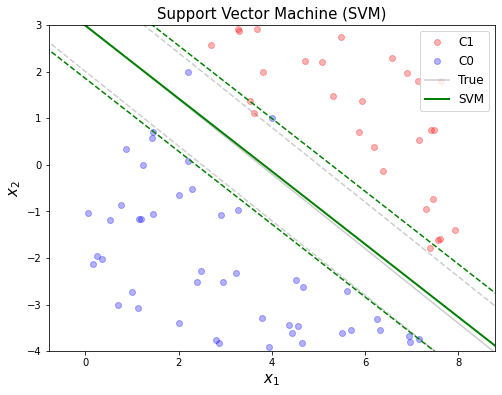

In [18]:
'''
xp, yp
'''
xp = np.linspace(-1,9,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]
'''
plot
'''
plt.figure(figsize=(8, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X0[:,1], X0[:,2], 'bo', alpha = 0.3, label = 'C0')

plt.plot(xp, ypt-1, '--k', alpha=0.2)
plt.plot(xp, ypt+1, '--k', alpha=0.2)
plt.plot(xp, ypt, 'k', alpha=0.2, label = 'True')

plt.plot(xp, yp-1/w[2,0], '--g')
plt.plot(xp, yp+1/w[2,0], '--g')
plt.plot(xp, yp, 'g', linewidth=2, label = 'SVM')

plt.title('Support Vector Machine (SVM)', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

## Nonlinear Support Vector Machine 

- Often we want to capture nonlinear patterns in the data
    - Nonlinear regression: input and output relationship may not be linear
    - Nonlinear classification: classes may note be separable by a linear boundary


- Linear models (e.g. linear regression, linear SVM) are not just rich enough


- Kernels: make linear model work in nonlinear settings
    - By mapping data to higher dimensions where it exhibits linear patterns
    - Apply the linear model in the new input feature space
    - Mapping $=$ changing the feature representation


- Note: such mappings can be expensive to compute in general
    - Kernels give such mappings for (almost) free
    - In most cases, the mappings need not be even computed
    - Using the Kernel trick !

- Classifying non-linear separable data

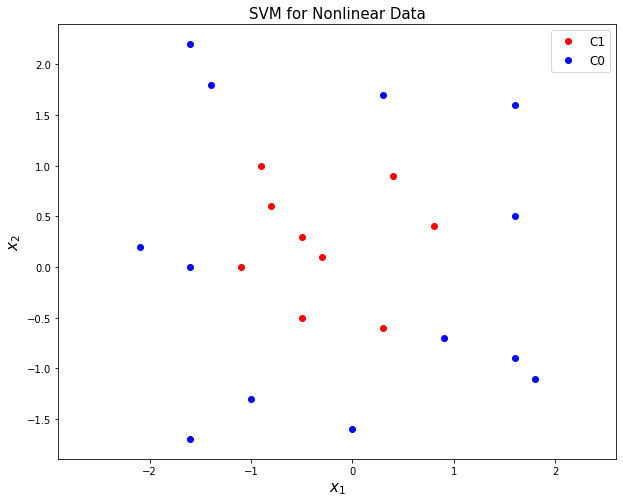

In [19]:
X1 = np.array([[-1.1,0],[-0.3,0.1],[-0.9,1],[0.8,0.4],[0.4,0.9],[0.3,-0.6],
               [-0.5,0.3],[-0.8,0.6],[-0.5,-0.5]])
     
X0 = np.array([[-1,-1.3], [-1.6,2.2],[0.9,-0.7],[1.6,0.5],[1.8,-1.1],[1.6,1.6],
               [-1.6,-1.7],[-1.4,1.8],[1.6,-0.9],[0,-1.6],[0.3,1.7],[-1.6,0],[-2.1,0.2]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

plt.figure(figsize=(10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.title('SVM for Nonlinear Data', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.show()

<br><br>
$$
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \quad \Longrightarrow \quad
z = \phi(x) = \begin{bmatrix} 1\\ x_1^2 \\ \sqrt{2}x_1 x_2 \\x_2^2 \end{bmatrix}$$

In [20]:
N = X1.shape[0]
M = X0.shape[0]

X = np.vstack([X1, X0])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

m = N + M
Z = np.hstack([np.ones([m,1]), np.square(X[:,0]), np.sqrt(2)*np.multiply(X[:,0],X[:,1]), np.square(X[:,1])])

In [23]:
'''
cvxpy 로 w 구하기
Hint : SVM compact ver에서 X -> Z

'''
g = 2

w = cvx.Variable([4, 1])
d = cvx.Variable([m, 1])

obj = cvx.Minimize(cvx.norm(w,2) + g*(np.ones([1,m])@d))
const = [cvx.multiply(y, Z@w) >= 1-d, d >= 0]
prob = cvx.Problem(obj, const).solve()

w = w.value
print(w)

[[ 2.69009009]
 [-1.44144144]
 [-0.57332982]
 [-1.44144144]]


In [24]:
# test
[X1gr, X2gr] = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

m = Xp.shape[0]
Zp = np.hstack([np.ones([m,1]), np.square(Xp[:,0]), np.sqrt(2)*np.multiply(Xp[:,0],Xp[:,1]), np.square(Xp[:,1])])


In [30]:
# test
print(np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)]))

[[-3.  -3. ]
 [-2.9 -3. ]
 [-2.8 -3. ]
 ...
 [ 2.7  2.9]
 [ 2.8  2.9]
 [ 2.9  2.9]]


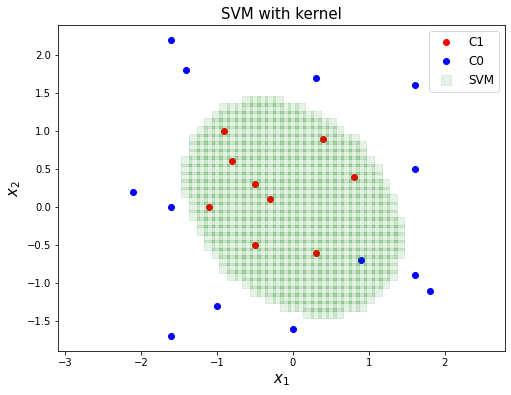

In [33]:
# to plot
[X1gr, X2gr] = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

m = Xp.shape[0]
Zp = np.hstack([np.ones([m,1]), np.square(Xp[:,0]), np.sqrt(2)*np.multiply(Xp[:,0],Xp[:,1]), np.square(Xp[:,1])])

'''
Zp*w > 0 인 Xp 선별

'''
q = Zp*w
B = []
for i in range(m) :
    if q[i,0] > 0:
        B.append(Xp[i,:])

B = np.vstack(B)
'''
plot
'''
plt.figure(figsize=(8, 6))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.plot(B[:,0], B[:,1], 'gs', markersize=10, alpha = 0.1, label = 'SVM')
plt.title('SVM with kernel', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.show()

# Logistic Regression

## Logistic Regression using Scikit-Learn

<br><br>
$$ 
\begin{align*}
\omega &= \begin{bmatrix}  \omega_1 \\ \omega_2\end{bmatrix}, \qquad \omega_0, \qquad x = \begin{bmatrix} x_1 \\ x_2\end{bmatrix}\\ \\
X &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T \\ \vdots\end{bmatrix} = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ x_1^{(3)} & x_2^{(3)} \\ \vdots & \vdots \\\end{bmatrix}, \qquad y  = \begin{bmatrix} y^{(1)}\\ y^{(2)} \\y^{(3)} \\ \vdots \end{bmatrix}
\end{align*}
$$

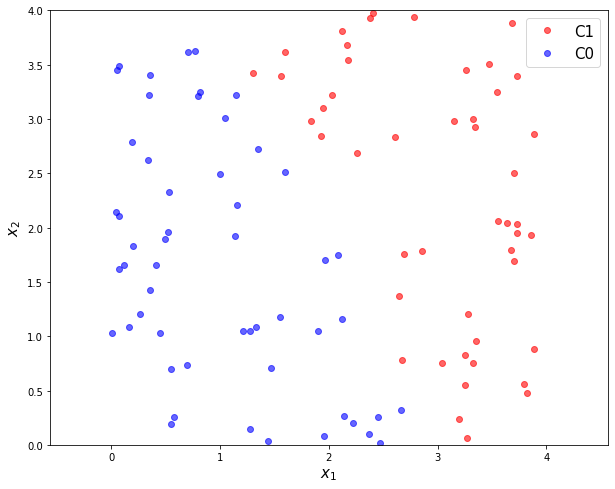

In [9]:
# data generation

m = 100
w = np.array([[-6], [2], [1]]) # bias를 포함 할 수도 있고 안할 수도 있다.
X = np.hstack([np.ones([m,1]), 4*np.random.rand(m,1), 4*np.random.rand(m,1)]) # np.ones([m,1]) bias를 포함 -> 뒤에서 안씀

w = np.asmatrix(w)
X = np.asmatrix(X)

y = 1/(1 + np.exp(-X*w)) > 0.5

C1 = np.where(y == True)[0] # np.where가 2가지를 반환함 (index, boolean) 이중에서 index만 사용
C0 = np.where(y == False)[0]

y = np.empty([m,1]) # y는 n X 1을 가진 벡터 1 또는 0
y[C1] = 1
y[C0] = 0

plt.figure(figsize=(10,8))
plt.plot(X[C1,1], X[C1,2], 'ro', alpha = 0.6, label='C1') # X중에서 첫번째(0)는 안쓰고 1과 2만 사용함
plt.plot(X[C0,1], X[C0,2], 'bo', alpha = 0.6, label='C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.show()

In [10]:
X = X[:,1:3] # np.ones([m,1]) 생략

X.shape

(100, 2)

In [11]:
from sklearn import linear_model

'''
sklearn logsticRegression
solver = 'lbfgs'

'''
clf = linear_model.LogisticRegression(solver='lbfgs')
#"fit data to the model"
clf.fit(X, np.ravel(y))
#clf.fit(X, y)

LogisticRegression()

In [39]:
clf.coef_

array([[2.86002028, 1.57243521]])

In [40]:
clf.intercept_

array([-8.88450961])

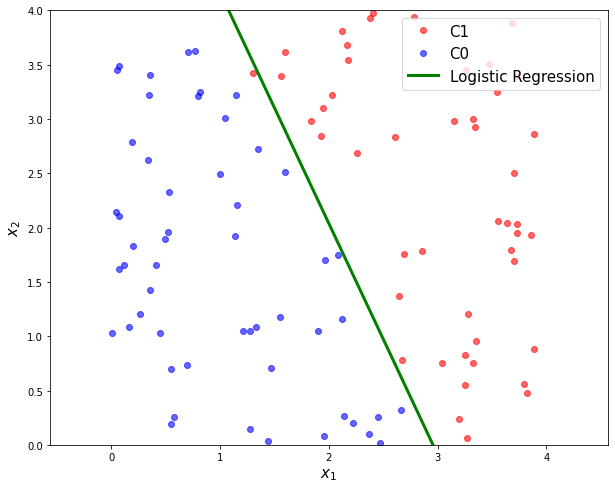

In [12]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

xp = np.linspace(0,4,100).reshape(-1,1)
'''
xp, yp 구하기
'''
yp = -(w1/w2)*xp-w0/w2
'''
plot
'''
plt.figure(figsize=(10,8))
plt.plot(X[C1,0], X[C1,1], 'ro', alpha = 0.6, label='C1') # X중에서 첫번째(0)는 안쓰고 1과 2만 사용함
plt.plot(X[C0,0], X[C0,1], 'bo', alpha = 0.6, label='C0')
plt.plot(xp, yp, 'g', linewidth=3, label='Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.show()

## Non-linear Classification

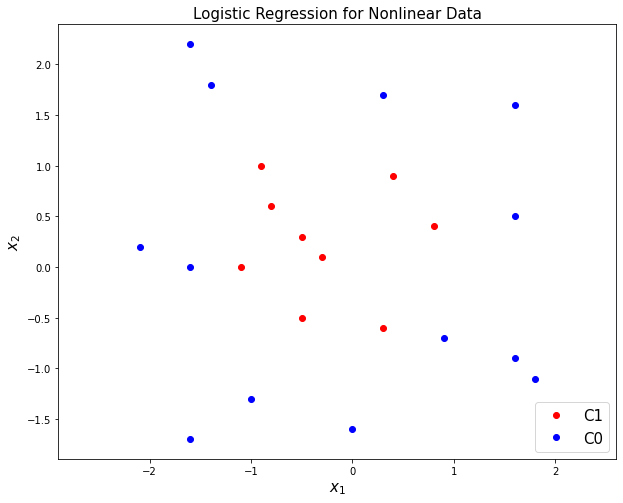

In [5]:
X1 = np.array([[-1.1,0],[-0.3,0.1],[-0.9,1],[0.8,0.4],[0.4,0.9],[0.3,-0.6],
               [-0.5,0.3],[-0.8,0.6],[-0.5,-0.5]])
     
X0 = np.array([[-1,-1.3], [-1.6,2.2],[0.9,-0.7],[1.6,0.5],[1.8,-1.1],[1.6,1.6],
               [-1.6,-1.7],[-1.4,1.8],[1.6,-0.9],[0,-1.6],[0.3,1.7],[-1.6,0],[-2.1,0.2]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

plt.figure(figsize=(10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.title('Logistic Regression for Nonlinear Data', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.axis('equal')
plt.legend(loc = 4, fontsize = 15)
plt.show()

<br><br>
$$
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \quad \Longrightarrow \quad
z = \phi(x) = \begin{bmatrix} 1\\ \sqrt{2}x_1\\ \sqrt{2}x_2 \\x_1^2 \\ \sqrt{2}x_1 x_2 \\x_2^2 \end{bmatrix}$$

In [6]:
N = X1.shape[0]
M = X0.shape[0]

X = np.vstack([X1, X0])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

m = N + M

'''
Z 구하기

'''
Z = np.hstack([np.ones([m,1]), np.square(X[:,0]), np.sqrt(2)*np.multiply(X[:,0],X[:,1]), np.square(X[:,1])])

In [7]:
g = 10

w = cvx.Variable([4, 1])
d = cvx.Variable([m, 1])

obj = cvx.Minimize(cvx.norm(w, 2) + g*np.ones([1,m])@d)
const = [cvx.multiply(y, Z@w) >= 1-d, d>=0]
prob = cvx.Problem(obj, const).solve()

w = w.value
print(w)

[[ 2.79259259]
 [-1.48148148]
 [-0.58925565]
 [-1.48148148]]


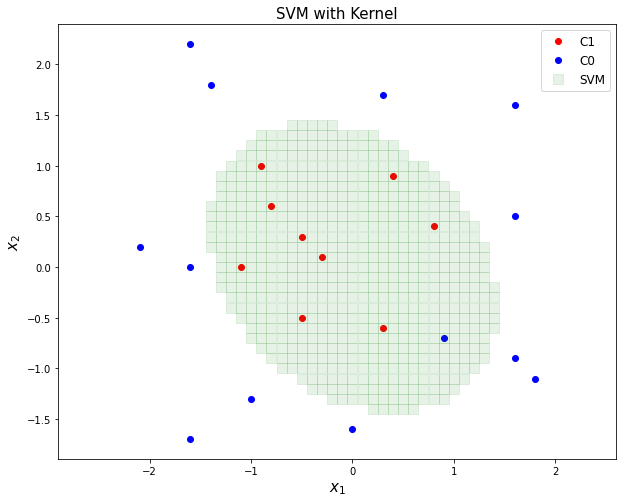

In [8]:
# to plot
'''
X1gr, X2gr
'''
[X1gr, X2gr] = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))
'''
Xp
'''
Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)
'''
Zp
'''
m = Xp.shape[0]
Zp = np.hstack([np.ones([m,1]), np.square(Xp[:,0]), np.sqrt(2)*np.multiply(Xp[:,0],Xp[:,1]), np.square(Xp[:,1])])
q = Zp*w

'''
Zp*w > 0 인 Xp 선별

'''
B = []
for i in range(m):
    if q[i,0] > 0:
        B.append(Xp[i,:])       

B = np.vstack(B)
'''
plot
'''
plt.figure(figsize=(10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.plot(B[:,0], B[:,1], 'gs', markersize = 10, alpha = 0.1, label = 'SVM')
plt.title('SVM with Kernel', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.show()